In [12]:
import pandas as pd
import numpy as np
import laspy
from sklearn.metrics import precision_recall_fscore_support
from pyntcloud import PyntCloud
from scipy.spatial import KDTree
from mpl_toolkits.mplot3d import Axes3D

import sys
sys.path.append('../src')
import helper

In [5]:
# Set the figure format to support high DPI
%config InlineBackend.figure_format = 'retina'

#### Import and read real point cloud (.las)

In [8]:
# Load the real point cloud
real_pc_path = '/home/Meins/Uni/TUM/SS23/Data Lab/Labelling/Label-Datasets/valid/validation_classified_merge.las'
real_pc = laspy.read(real_pc_path)

In [9]:
# Some quick data information
header_real = real_pc.header
offsets_real = [header_real.x_offset, header_real.y_offset, header_real.z_offset]
print(offsets_real)

# show maximum and minimum x, y, z values (offset substracted)
min_borders_real = header_real.min
max_borders_real = header_real.max
print(min_borders_real - offsets_real)
print(max_borders_real - offsets_real)

[670000.0, 5400000.0, 0.0]
[8043.80273438 3798.9362793   412.77938843]
[8102.40722656 3887.64355469  443.08679199]


In [10]:
class_descriptions = {
    1: 'Road',
    2: 'Ground',
    3: 'Road Installations',
    6: 'Wall Surface',
    7: 'Roof Surface',
    8: 'Doors',
    9: 'Windows'
}
relevant_classes = list(class_descriptions.keys())

In [13]:
# Extract the relevant classes from the real point cloud
real_points = real_pc.points
real_labels = real_points['classification']
relevant_indices = np.isin(real_labels, relevant_classes)
relevant_points_real = real_points[relevant_indices]
print(relevant_points_real)
real_xyz = relevant_points_real[['x', 'y', 'z']]

<ScaleAwarePointRecord(fmt: <PointFormat(0, 8 bytes of extra dims)>, len: 12821228, point size: 28)>


#### Visualize point cloud

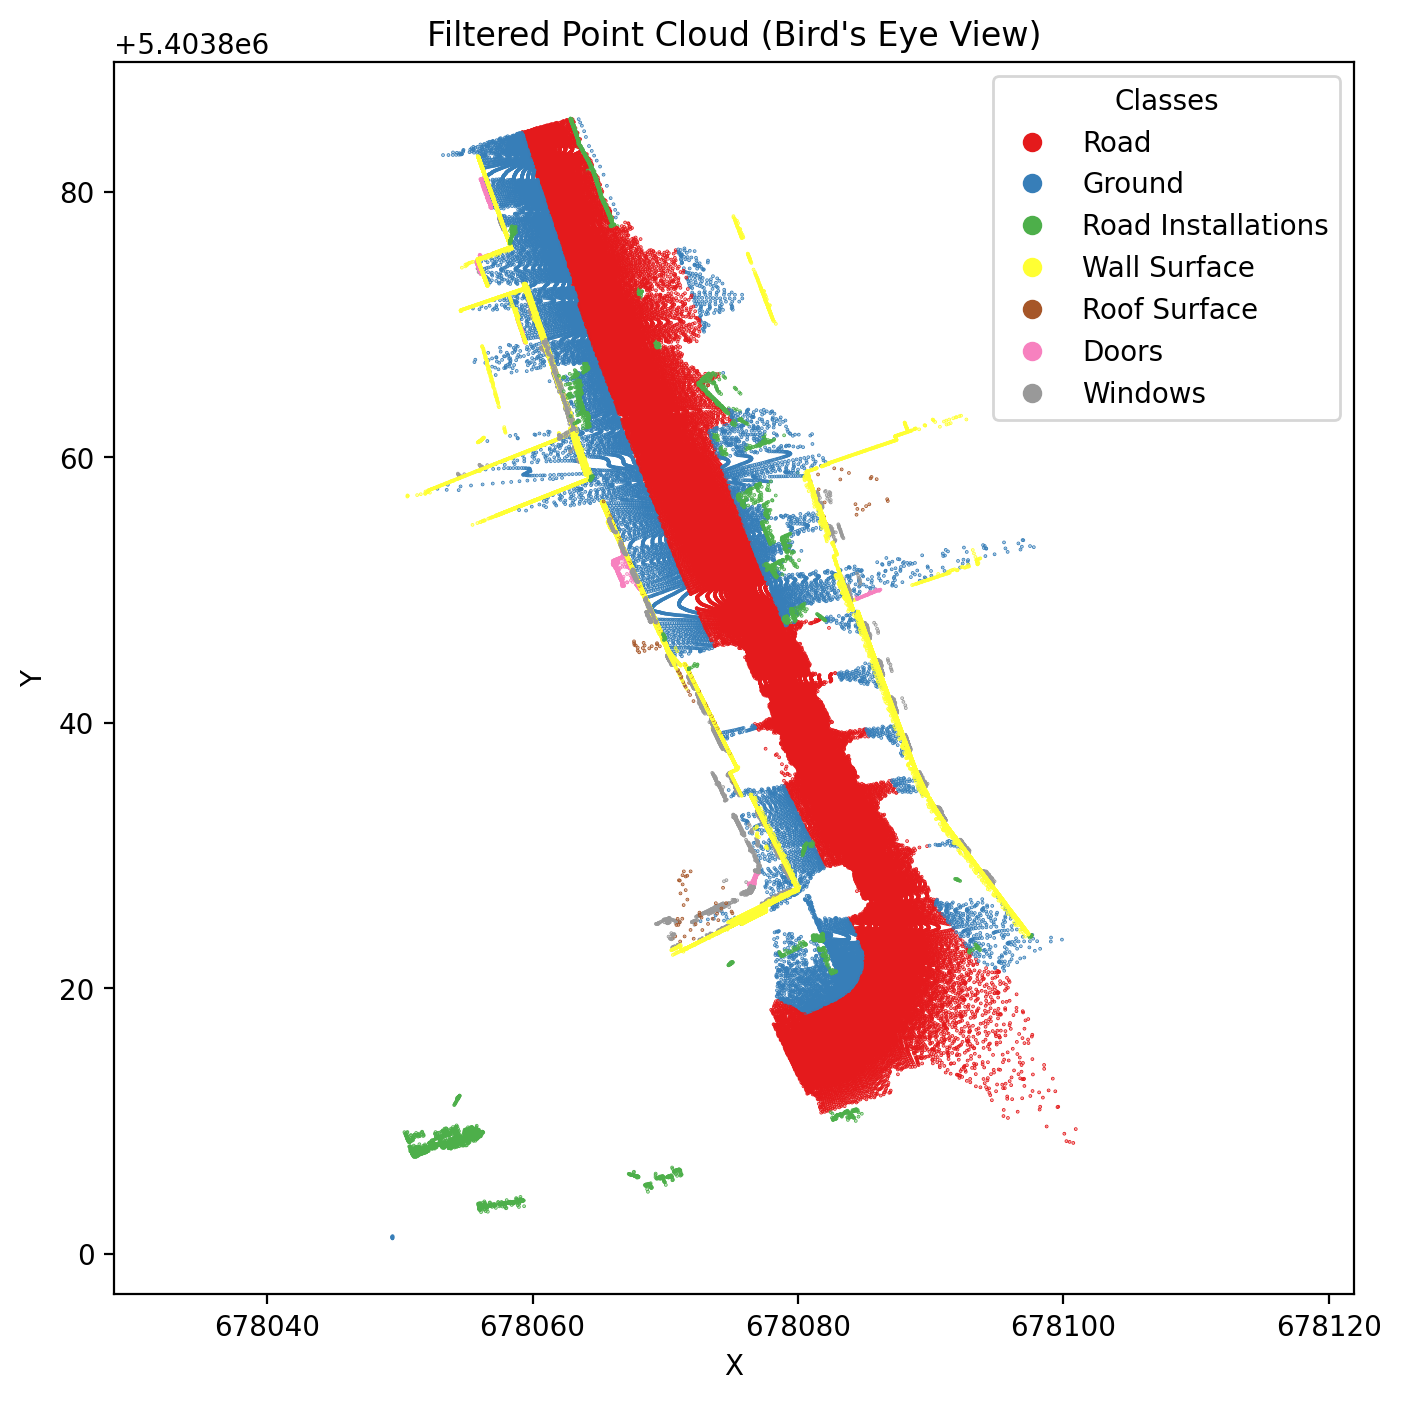

In [14]:
helper.plot_bev(relevant_points_real, class_descriptions)

#### Load Synthetic Point Cloud

In [15]:
# Load the real point cloud
synth_pc_path = '/home/Meins/Uni/TUM/SS23/Data Lab/Labelling/Label-Datasets/valid/validation_classified_merge.las'
synth_pc = laspy.read(synth_pc_path)

In [16]:
# Some quick data information
header_synth = synth_pc.header
offsets_real = [header_synth.x_offset, header_synth.y_offset, header_synth.z_offset]
min_borders_synth = header_synth.min
max_borders_synth = header_synth.max

In [17]:
synth_points = synth_pc.points
synth_labels = synth_points['classification']
relevant_indices_synth = np.isin(synth_labels, relevant_classes)
relevant_points_synth = synth_points[relevant_indices_synth]
synth_xyz = relevant_points_synth[['x', 'y', 'z']]

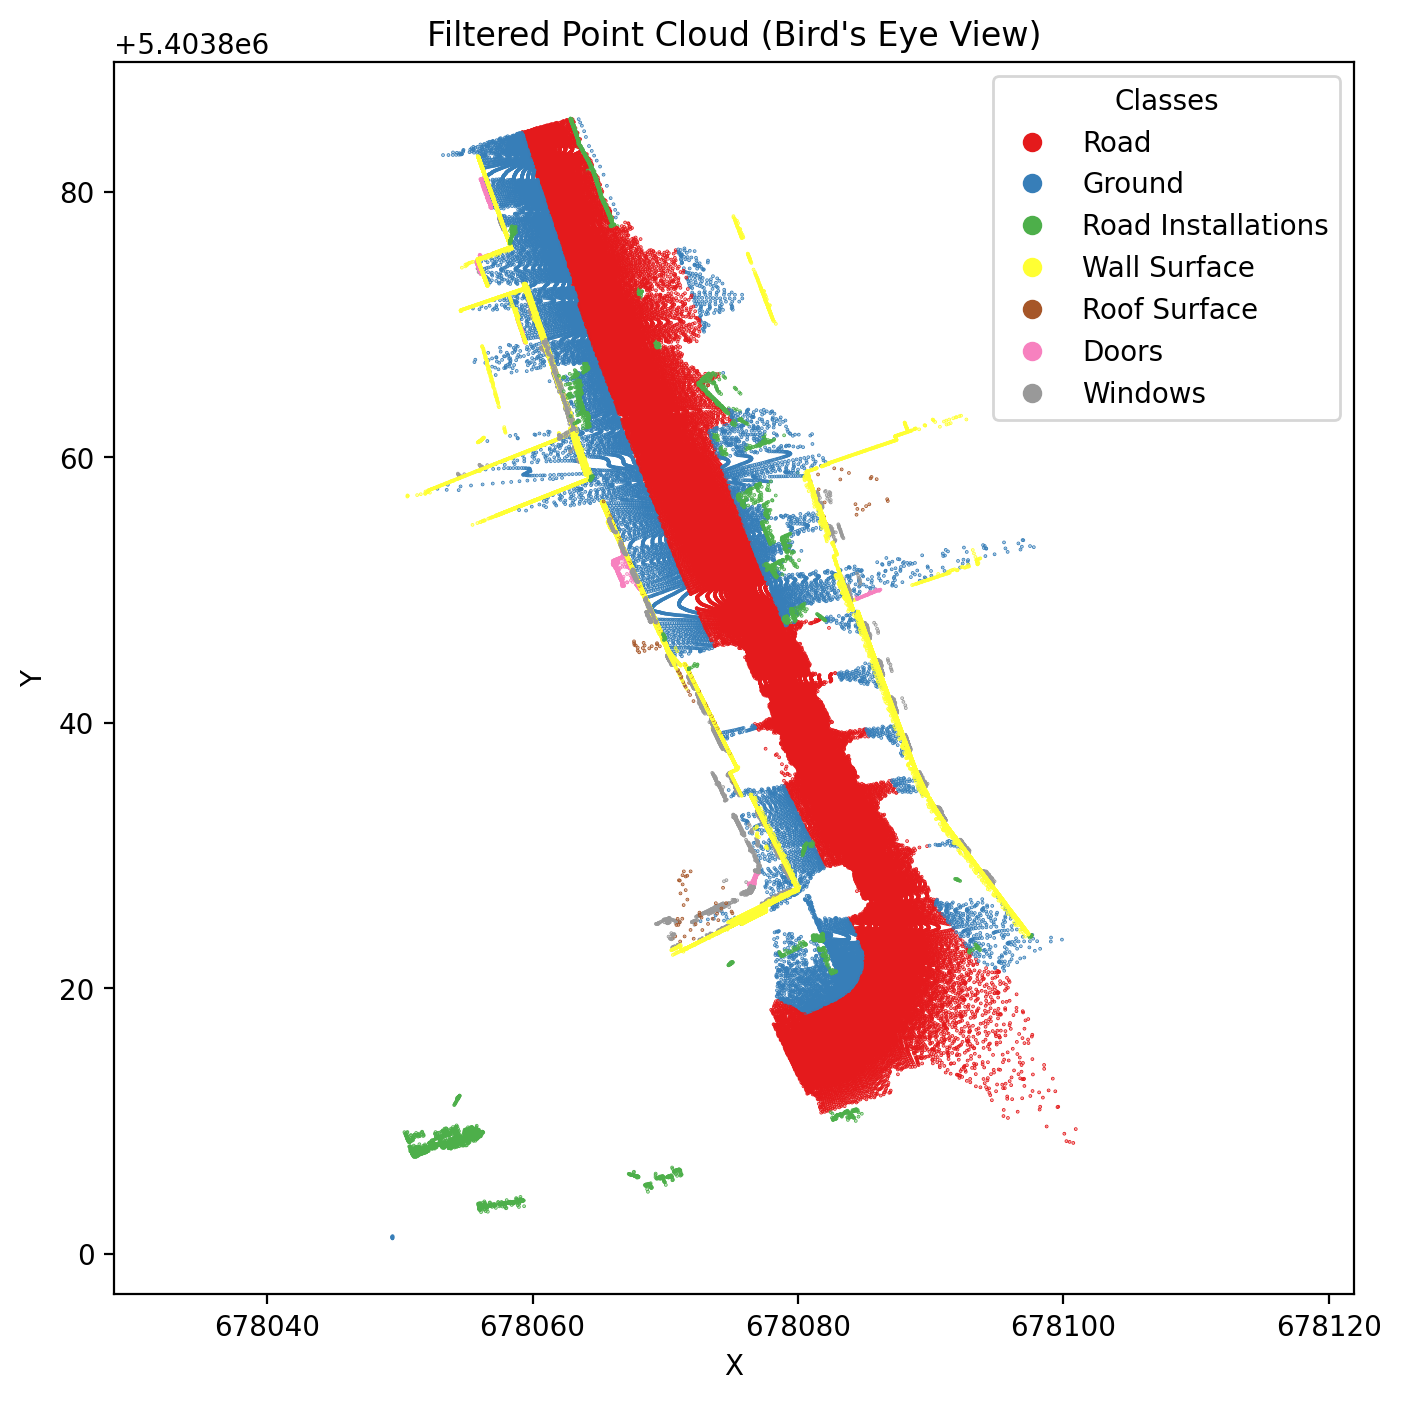

In [19]:
# visualize synthetic point cloud
helper.plot_bev(relevant_points_synth, class_descriptions)

#### Crop Point Clouds (intersection)

In [20]:
# borders constructed by relevent points only (e.g. noise points do not count)
# TODO: this takes ages to compute!
#max_xyz = np.minimum(np.amax(synth_xyz, axis=0), np.amax(real_xyz, axis=0)) # smallest upper bound
#min_xyz = np.maximum(np.amin(synth_xyz, axis=0), np.amin(real_xyz, axis=0)) # greatest lower bound

In [22]:
padding = 1.0
# TODO: this is bad as we do not filter for our relevant classes (see above)
min_xyz = np.maximum(min_borders_real, min_borders_synth) 
max_xyz = np.minimum(max_borders_real, max_borders_synth)
bounding_box = np.add(np.concatenate((min_xyz, max_xyz)), [-padding, -padding, -padding, padding, padding, padding])

In [23]:
real_cropped = helper.crop_point_cloud(relevant_points_real, bounding_box)
synth_cropped = helper.crop_point_cloud(relevant_points_synth, bounding_box)
# TODO: Are the labels and eversthing else also cropped correctly???

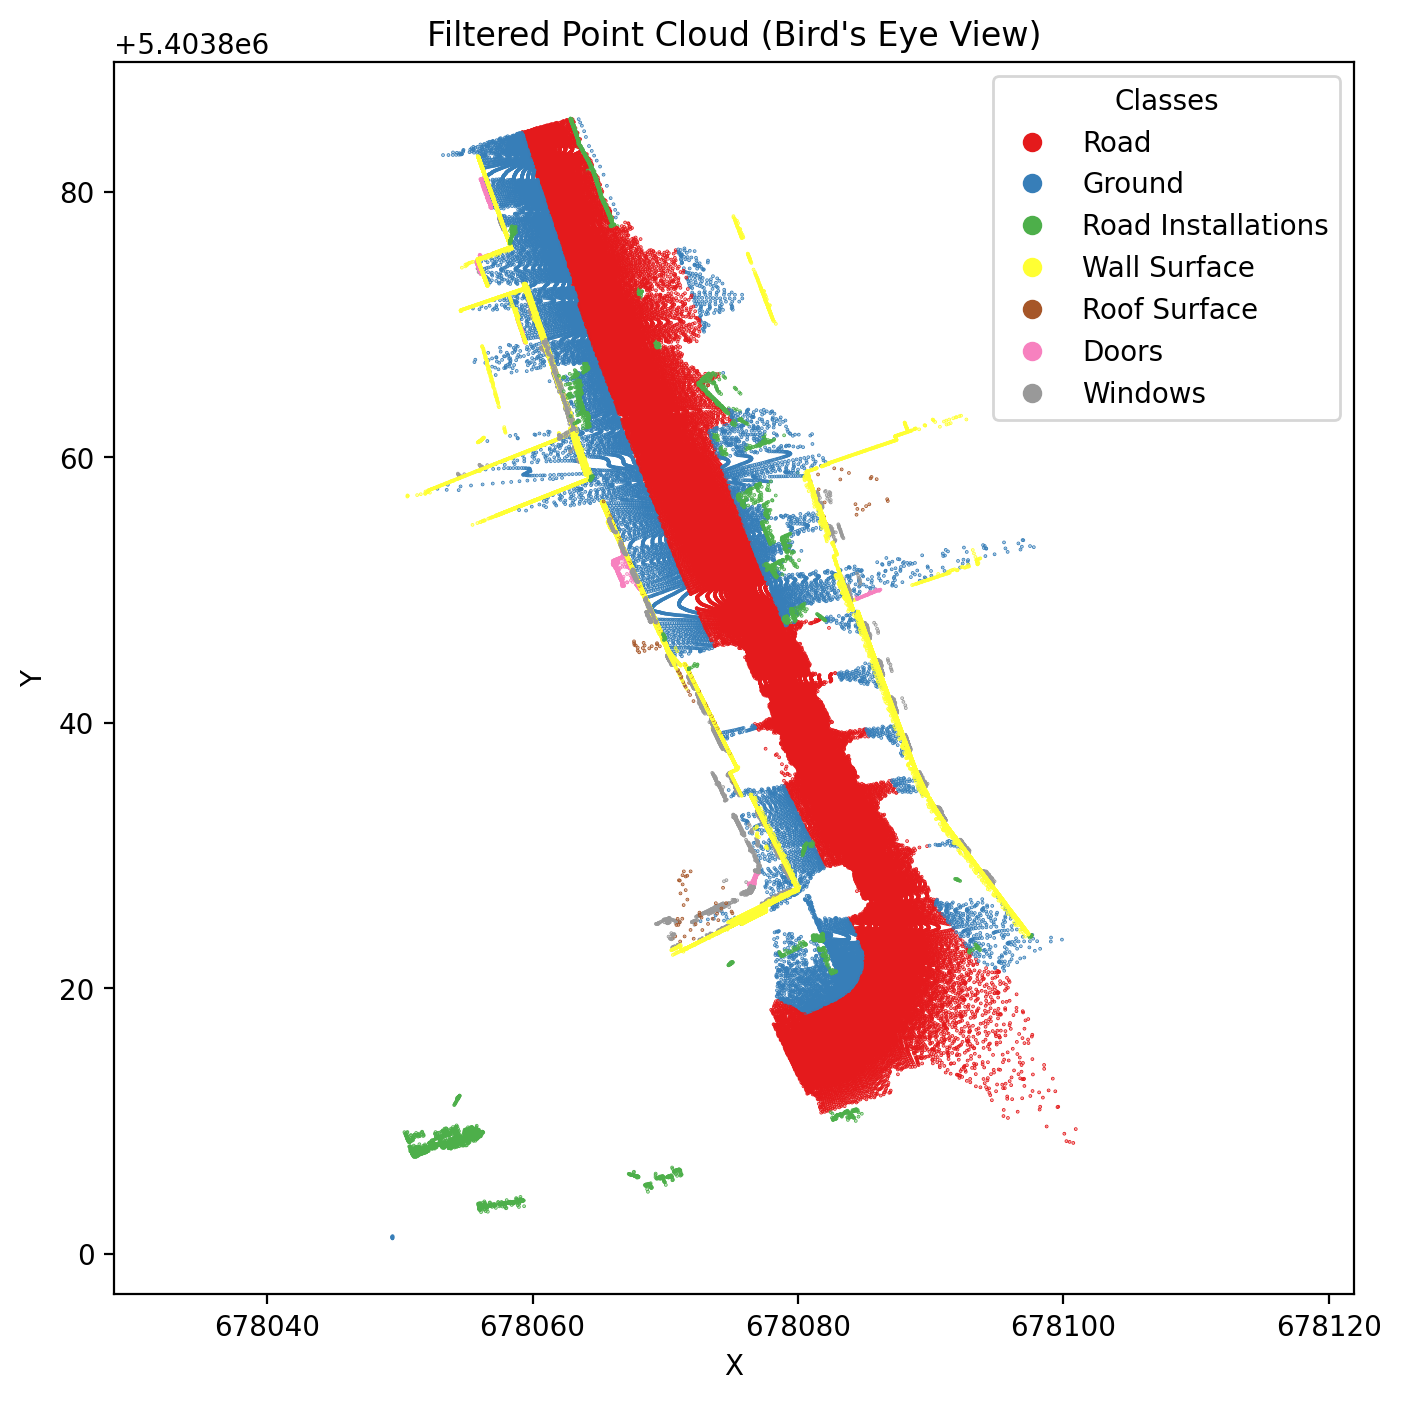

In [24]:
# plot cropped point clouds
helper.plot_bev(real_cropped, class_descriptions)

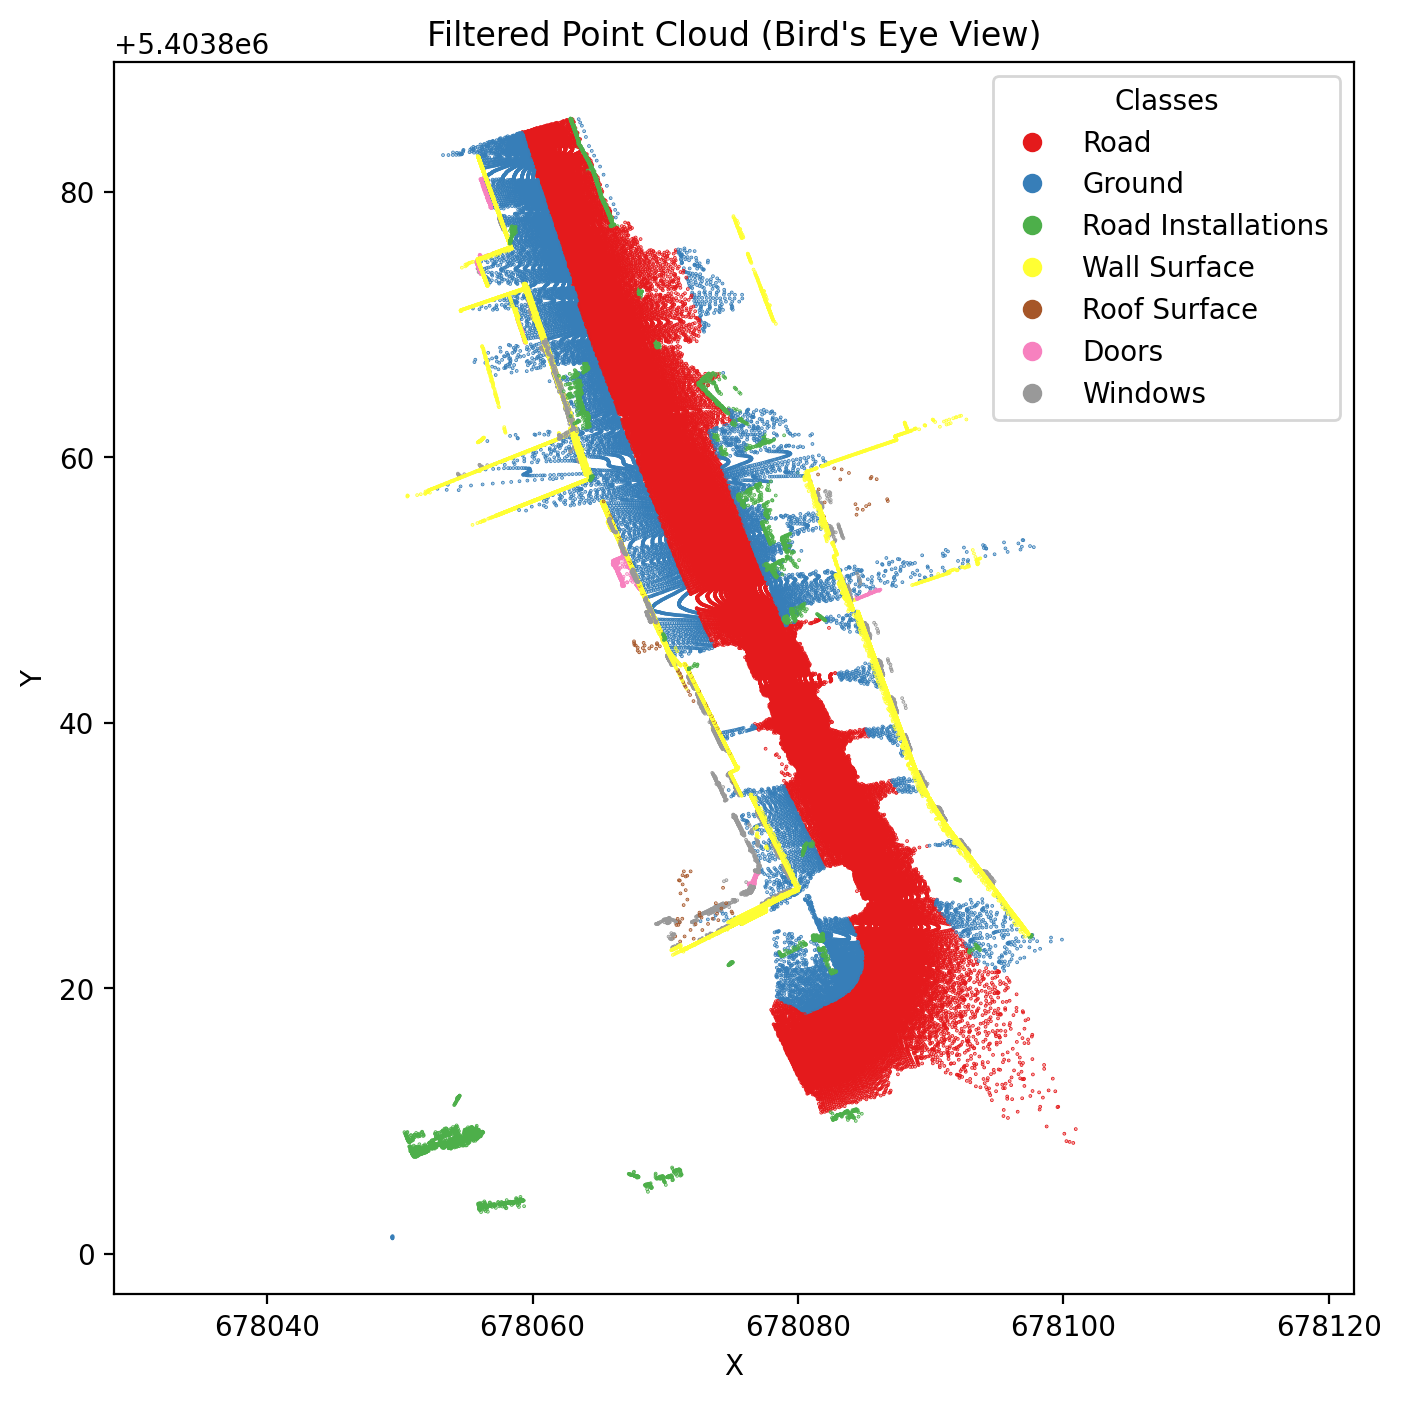

In [25]:
# plot cropped point clouds
helper.plot_bev(synth_cropped, class_descriptions)

#### Geometric Similarity (Haussdorff Distance)

In [ ]:
# Compute the geometric difference between the aligned point clouds
#geometric_difference = np.linalg.norm(real_xyz - synthetic_aligned_xyz, axis=1)
#geometric_mean_difference = np.mean(geometric_difference)
#geometric_max_difference = np.max(geometric_difference)